<a href="https://colab.research.google.com/github/convenience-tinashe-chibatamoto/Iris-Flower-Classification/blob/main/Iris_Flower_Classification_using_3_different_models_SVM%2C_Extremely_Randomized_Trees_and_Naive_Bayes_with_emphasis_on_preventing_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Loading the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Standardising features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Reducing dimensionality with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [6]:
# Initialising classifiers
svm = SVC(probability=True, kernel='linear', C=1.0, random_state=42)
ext_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
nb = GaussianNB()

In [7]:
# Dictionary to hold models and their names
models = {
    'SVM': svm,
    'Extremely Randomized Trees': ext_trees,
    'Naive Bayes': nb
}

# Dictionary to hold accuracy scores
scores = {}

In [8]:
# Training and evaluating each model using a for loop
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    scores[model_name] = accuracy

In [9]:
# Model Soups
def model_soups_acc(scores):
    # Calculate the average accuracy
    average_accuracy = np.mean(list(scores.values()))
    # Add the average accuracy to the dictionary
    scores['Average Result'] = average_accuracy
    return scores

# Update the scores dictionary with the averaged result
scores = model_soups_acc(scores)

# Visualization
def visualize_scores(scores):
    # Names of models
    model_names = list(scores.keys())
    # Corresponding scores
    model_scores = list(scores.values())



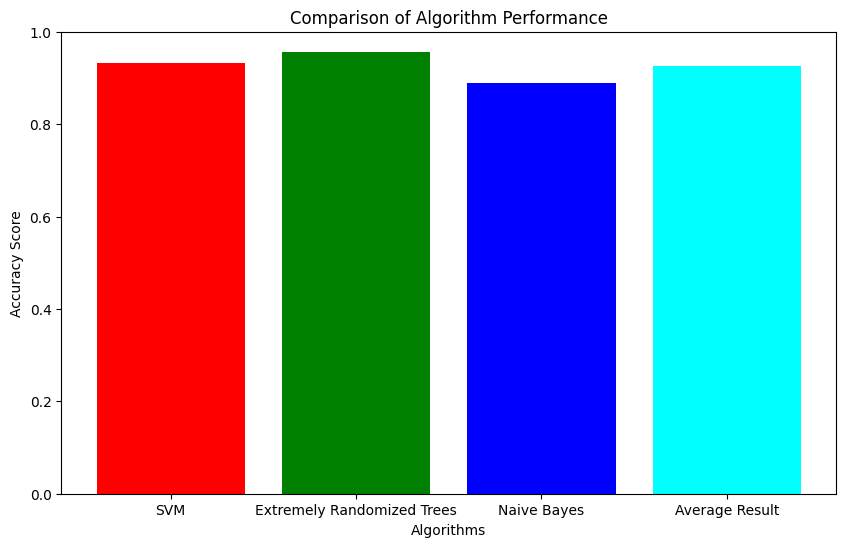

In [10]:
# Plotting the results
labels = list(scores.keys())
acc_scores = list(scores.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, acc_scores, color=['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lime', 'orange', 'purple', 'brown'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Algorithm Performance')
plt.ylim([0, 1])
plt.show()
